In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

plt.style.use('fivethirtyeight')


plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

%matplotlib inline


## PART 1

### 1)

In [60]:
#read datasets
btc_price = pd.read_csv('../data/BTCPrice.csv', index_col=['Date'])
btc_price.columns = ['PRICE']

btc_trd_vol = pd.read_csv('../data/BTCTradeVolume.csv', index_col=['Date'])
btc_trd_vol.columns = [ 'TRD_VOLUME']

btc_miner_fees =  pd.read_csv('../data/BTCtransaction-fees.csv', index_col=['Date'])
btc_miner_fees.columns = ['MINERS_FEE']


btc_transaction_vol = pd.read_csv('../data/BTCTransactionVolume.csv', index_col=['Date'])
btc_transaction_vol.columns = ['TRAN_VOL']

btc_price_vol = pd.read_csv('../data/BTCprice-volatility.csv', index_col=['Date'])
btc_price_vol.columns = ['PRICE_VOL']

btc_miner_revenue =  pd.read_csv('../data/BTCminer-revenue.csv', index_col=['Date'])
btc_miner_revenue.columns = ['MINERS_REVENUE']

btc_difficulty = pd.read_csv('../data/BTCDifficulty.csv', index_col=['Date'])
btc_difficulty.columns = ['DIFFICULTY']

btc_transaction_per_block = pd.read_csv('../data/BTCTransactionPerBlock.csv', index_col=['Date'])
btc_transaction_per_block.columns = ['TRAN_BLOCK']

btc_hash_rate = pd.read_csv('../data/BTChash-rate.csv', index_col=['Date'])
btc_hash_rate.columns = ['HASH_RATE'] 

bch_price =  pd.read_csv('../data/BCHprice.csv', index_col=['Date'])
bch_price.columns = ['BCH_PRICE']

btc_money_supply =  pd.read_csv('../data/BTCmoney-supply.csv', index_col=['Date'])
btc_money_supply.columns = ['MONEY_SUPPLY']



btc_data = pd.concat([btc_price, btc_trd_vol, btc_miner_fees, btc_transaction_vol, btc_price_vol,
                     btc_miner_revenue, btc_difficulty, btc_transaction_per_block, btc_hash_rate,
                     btc_money_supply, bch_price], axis=1, sort=True)
btc_data.index= pd.to_datetime(btc_data.index, format='%Y-%m-%d')
btc_data = btc_data.loc[(btc_data.index >= '2010-01-01') & (btc_data.index <= '2019-06-30')]

In [61]:
btc_data.head(10)

,PRICE,TRD_VOLUME,MINERS_FEE,TRAN_VOL,PRICE_VOL,MINERS_REVENUE,DIFFICULTY,TRAN_BLOCK,HASH_RATE,MONEY_SUPPLY,BCH_PRICE
2010-01-01,0.0,0.0,0.0,0.0,NaN,6900.0,1.0,1.0,0.000008,1624700.0,0.0
2010-01-02,0.0,0.0,0.0,100.0,NaN,6600.0,1.0,1.0,0.000008,1631300.0,0.0
2010-01-03,0.0,0.0,0.0,0.0,NaN,6300.0,1.0,1.0,0.000007,1637600.0,0.0
2010-01-04,0.0,0.0,0.0,20778.0,NaN,9300.0,1.0,1.0,0.000007,1646900.0,0.0
2010-01-05,0.0,0.0,0.0,0.0,NaN,9050.0,1.0,1.0,0.000008,1655950.0,0.0
2010-01-06,0.0,0.0,0.0,0.0,NaN,9900.0,1.0,1.0,0.000008,1665850.0,0.0
2010-01-07,0.0,0.0,0.0,0.0,NaN,8150.0,1.0,1.0,0.000008,1674000.0,0.0
2010-01-08,0.0,0.0,0.0,0.0,NaN,7700.0,1.0,1.0,0.000008,1681700.0,0.0
2010-01-09,0.0,0.0,0.0,0.0,NaN,7650.0,1.0,1.0,0.000008,1689350.0,0.0
2010-01-10,0.0,0.0,0.0,0.0,NaN,7550.0,1.0,1.0,0.000008,1696900.0,0.0


0 price does not make sense in the beginning of 2010. Its probably due to the lack of trading on exchanges at that time. It would be best to drop rows with 0 price or 0 trade volume. Since prices with 0 trading volume are also not reliable


In [62]:
btc_data = btc_data.drop(btc_data[btc_data['PRICE']==0].index)

In [63]:
btc_data.describe()

,PRICE,TRD_VOLUME,MINERS_FEE,TRAN_VOL,PRICE_VOL,MINERS_REVENUE,DIFFICULTY,TRAN_BLOCK,HASH_RATE,MONEY_SUPPLY,BCH_PRICE
count,3240.000000,3.240000e+03,3240.000000,3.240000e+03,3240.000000,3240.000000,3.240000e+03,3240.000000,3.240000e+03,3.240000e+03,3240.000000
mean,1784.235752,1.291471e+08,61.613730,2.034392e+05,76.235959,4399.985644,1.041392e+12,883.314062,7.608236e+06,1.287301e+07,436.786290
std,3097.652417,3.324501e+08,111.997930,2.528356e+05,50.449536,2519.248731,2.101884e+12,765.905471,1.525644e+07,3.899653e+06,538.467441
min,0.060900,5.131510e+01,0.000000,6.221000e+03,0.000000,1242.089114,5.120000e+02,1.000000,3.970459e-03,3.739600e+06,0.060000
25%,13.712525,6.742530e+05,12.662478,1.073318e+05,39.107889,2166.924622,3.054628e+06,224.000000,2.176505e+01,1.031562e+07,13.440000
50%,385.080000,7.818132e+06,24.843805,1.719355e+05,64.459420,3830.998224,4.127287e+10,632.500000,3.110143e+05,1.375114e+07,287.605000
75%,1230.232719,8.482045e+07,52.676742,2.522833e+05,99.656925,5903.135531,4.996359e+11,1536.395369,3.697014e+06,1.626728e+07,606.700000
max,19498.683333,5.352016e+09,1495.748916,5.825066e+06,272.447767,15371.520742,7.934713e+12,2762.540984,6.219192e+07,1.778861e+07,3810.470000


### 2)

Text(0.5, 0, 'date')

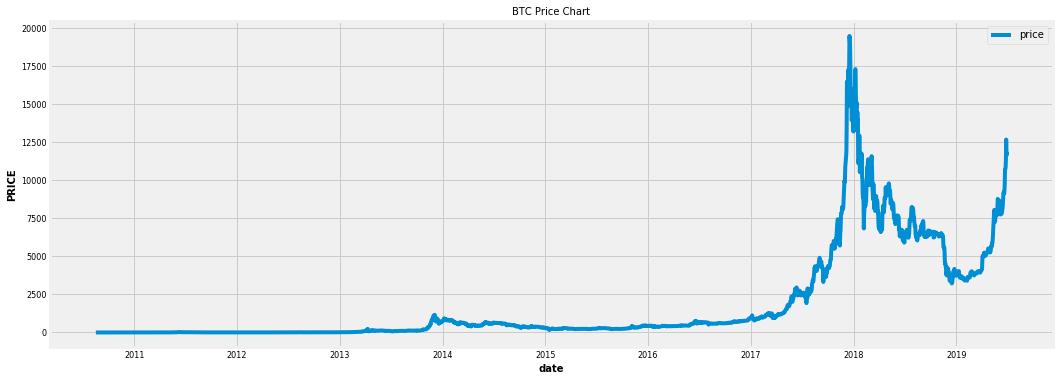

In [64]:
plt.figure(figsize=(16,6))
plt.title('BTC Price Chart')
sns.lineplot(btc_data.index, btc_data['PRICE'], label='price')
plt.xlabel('date')

### 2 & 3)

In [88]:
# lets split our data set before we do analysis on data set to make testing phase completely independent

target = 'PRICE'
base_features = set(btc_data.columns) - set([target])

train_mask = (btc_data.index >= '2010-01-01') & (btc_data.index <= '2018-06-30')
valid_mask = (btc_data.index >= '2018-07-01') & (btc_data.index <= '2018-12-31')
test_mask = (btc_data.index >= '2019-01-01') & (btc_data.index <= '2019-06-30')

X_train =  btc_data.loc[train_mask][base_features]
y_train =  btc_data.loc[train_mask][target]

X_valid =  btc_data.loc[valid_mask][base_features]
y_valid = btc_data.loc[valid_mask][target]

X_test =  btc_data.loc[test_mask][base_features]

missing = X_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

Series([], dtype: int64)

In [90]:
#using constant imputer for price volatility and standard scaler for normalization
constant_imputer = SimpleImputer(strategy='constant')

#normalizer
normalizer = StandardScaler()

def preprocessing_pipeline(X, train=False):
    if  train:
        X = pd.DataFrame(constant_imputer.fit_transform(X), columns=base_features)
        X = pd.DataFrame(normalizer.fit_transform(X), columns=base_features)
    else:
        X = pd.DataFrame(constant_imputer.transform(X), columns=base_features)
        X = pd.DataFrame(normalizer.transform(X), columns=base_features)
    return X
        
    
X_train = preprocessing_pipeline(X_train, train=True)
print(X_train.head())
X_train.describe()

   DIFFICULTY  MINERS_REVENUE  MINERS_FEE  TRD_VOLUME  TRAN_VOL  HASH_RATE  \
0   -0.401345        1.053534   -0.534373   -0.313495 -0.614176  -0.400393   
1   -0.401345        0.692685   -0.540073   -0.313497 -0.661082  -0.400393   
2   -0.401345        0.773439   -0.526801   -0.313496 -0.743868  -0.400393   
3   -0.401345        0.812879   -0.540073   -0.313496 -0.716115  -0.400393   
4   -0.401345        1.974750   -0.540073   -0.313496 -0.729967  -0.400393   

   MONEY_SUPPLY  PRICE_VOL  BCH_PRICE  TRAN_BLOCK  
0     -2.275506   3.109663  -0.788172   -1.088262  
1     -2.273790   1.865370  -0.788172   -1.088262  
2     -2.272020   1.759482  -0.788172   -1.088262  
3     -2.270224   1.671825  -0.788172   -1.088262  
4     -2.267656   1.671825  -0.788172   -1.088262  


,DIFFICULTY,MINERS_REVENUE,MINERS_FEE,TRD_VOLUME,TRAN_VOL,HASH_RATE,MONEY_SUPPLY,PRICE_VOL,BCH_PRICE,TRAN_BLOCK
count,2875.000000,2875.000000,2875.000000,2.875000e+03,2.875000e+03,2875.000000,2875.000000,2.875000e+03,2.875000e+03,2875.000000
mean,0.000000,0.000000,0.000000,-3.954325e-17,9.885812e-18,0.000000,0.000000,3.954325e-17,-3.954325e-17,0.000000
std,1.000174,1.000174,1.000174,1.000174e+00,1.000174e+00,1.000174,1.000174,1.000174e+00,1.000174e+00,1.000174
min,-0.401345,-1.393840,-0.540073,-3.134968e-01,-7.721767e-01,-0.400393,-2.275506,-1.490480e+00,-7.881899e-01,-1.088262
25%,-0.401343,-0.745121,-0.438186,-3.121002e-01,-3.824860e-01,-0.400391,-0.712382,-7.565535e-01,-7.677048e-01,-0.808669
50%,-0.382098,-0.293877,-0.328292,-3.010534e-01,-1.133388e-01,-0.380459,0.203169,-2.366451e-01,-3.008051e-01,-0.433927
75%,-0.168808,0.794226,-0.091774,-2.297856e-01,1.808648e-01,-0.177799,0.921280,4.703252e-01,3.105858e-01,0.860931
max,5.235757,4.267051,12.185104,1.545348e+01,2.108921e+01,5.560695,1.285660,3.687868e+00,5.943735e+00,2.895751


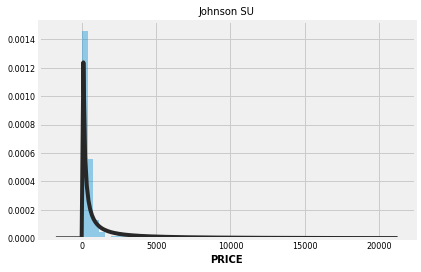

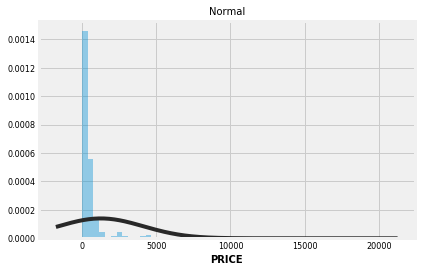

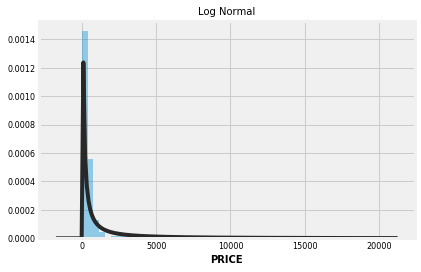

In [91]:
import scipy.stats as st
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y_train, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y_train, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y_train, kde=False, fit=st.lognorm)

Prices appear to be following lognormal distribution

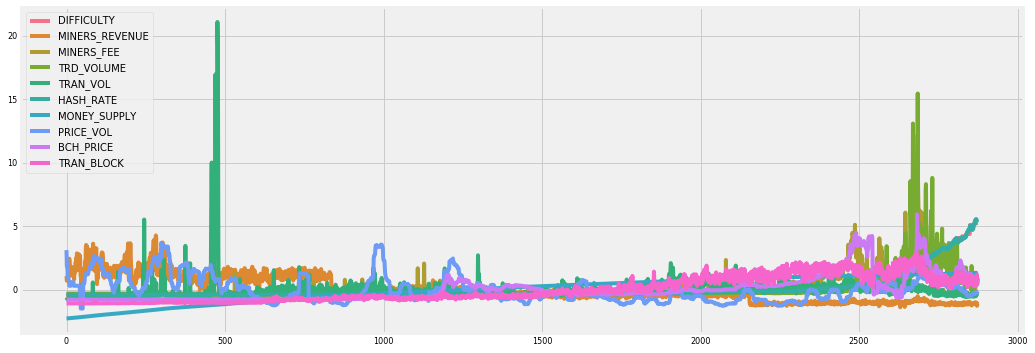

In [66]:
plt.figure(figsize=(16,6))

sns.lineplot(data=X_train, dashes=False)


### 4)

In [67]:
train_corr = X_train.corr()


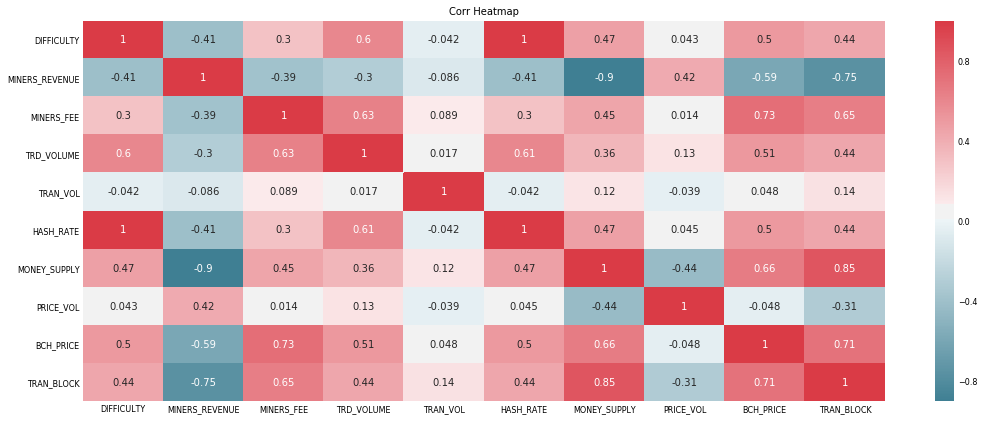

In [68]:
plt.figure(figsize=(16,7))

# Add title
plt.title("Corr Heatmap")
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data=train_corr, annot=True, cmap=cmap)



In [69]:
train_corr[np.abs(train_corr)>0.7]

,DIFFICULTY,MINERS_REVENUE,MINERS_FEE,TRD_VOLUME,TRAN_VOL,HASH_RATE,MONEY_SUPPLY,PRICE_VOL,BCH_PRICE,TRAN_BLOCK
DIFFICULTY,1.000000,NaN,NaN,NaN,NaN,0.998796,NaN,NaN,NaN,NaN
MINERS_REVENUE,NaN,1.000000,NaN,NaN,NaN,NaN,-0.902853,NaN,NaN,-0.754873
MINERS_FEE,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.729353,NaN
TRD_VOLUME,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
TRAN_VOL,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
HASH_RATE,0.998796,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
MONEY_SUPPLY,NaN,-0.902853,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.852471
PRICE_VOL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
BCH_PRICE,NaN,NaN,0.729353,NaN,NaN,NaN,NaN,NaN,1.000000,0.710018
TRAN_BLOCK,NaN,-0.754873,NaN,NaN,NaN,NaN,0.852471,NaN,0.710018,1.000000


/Users/rohitchandel/anaconda2/envs/mfe-env/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


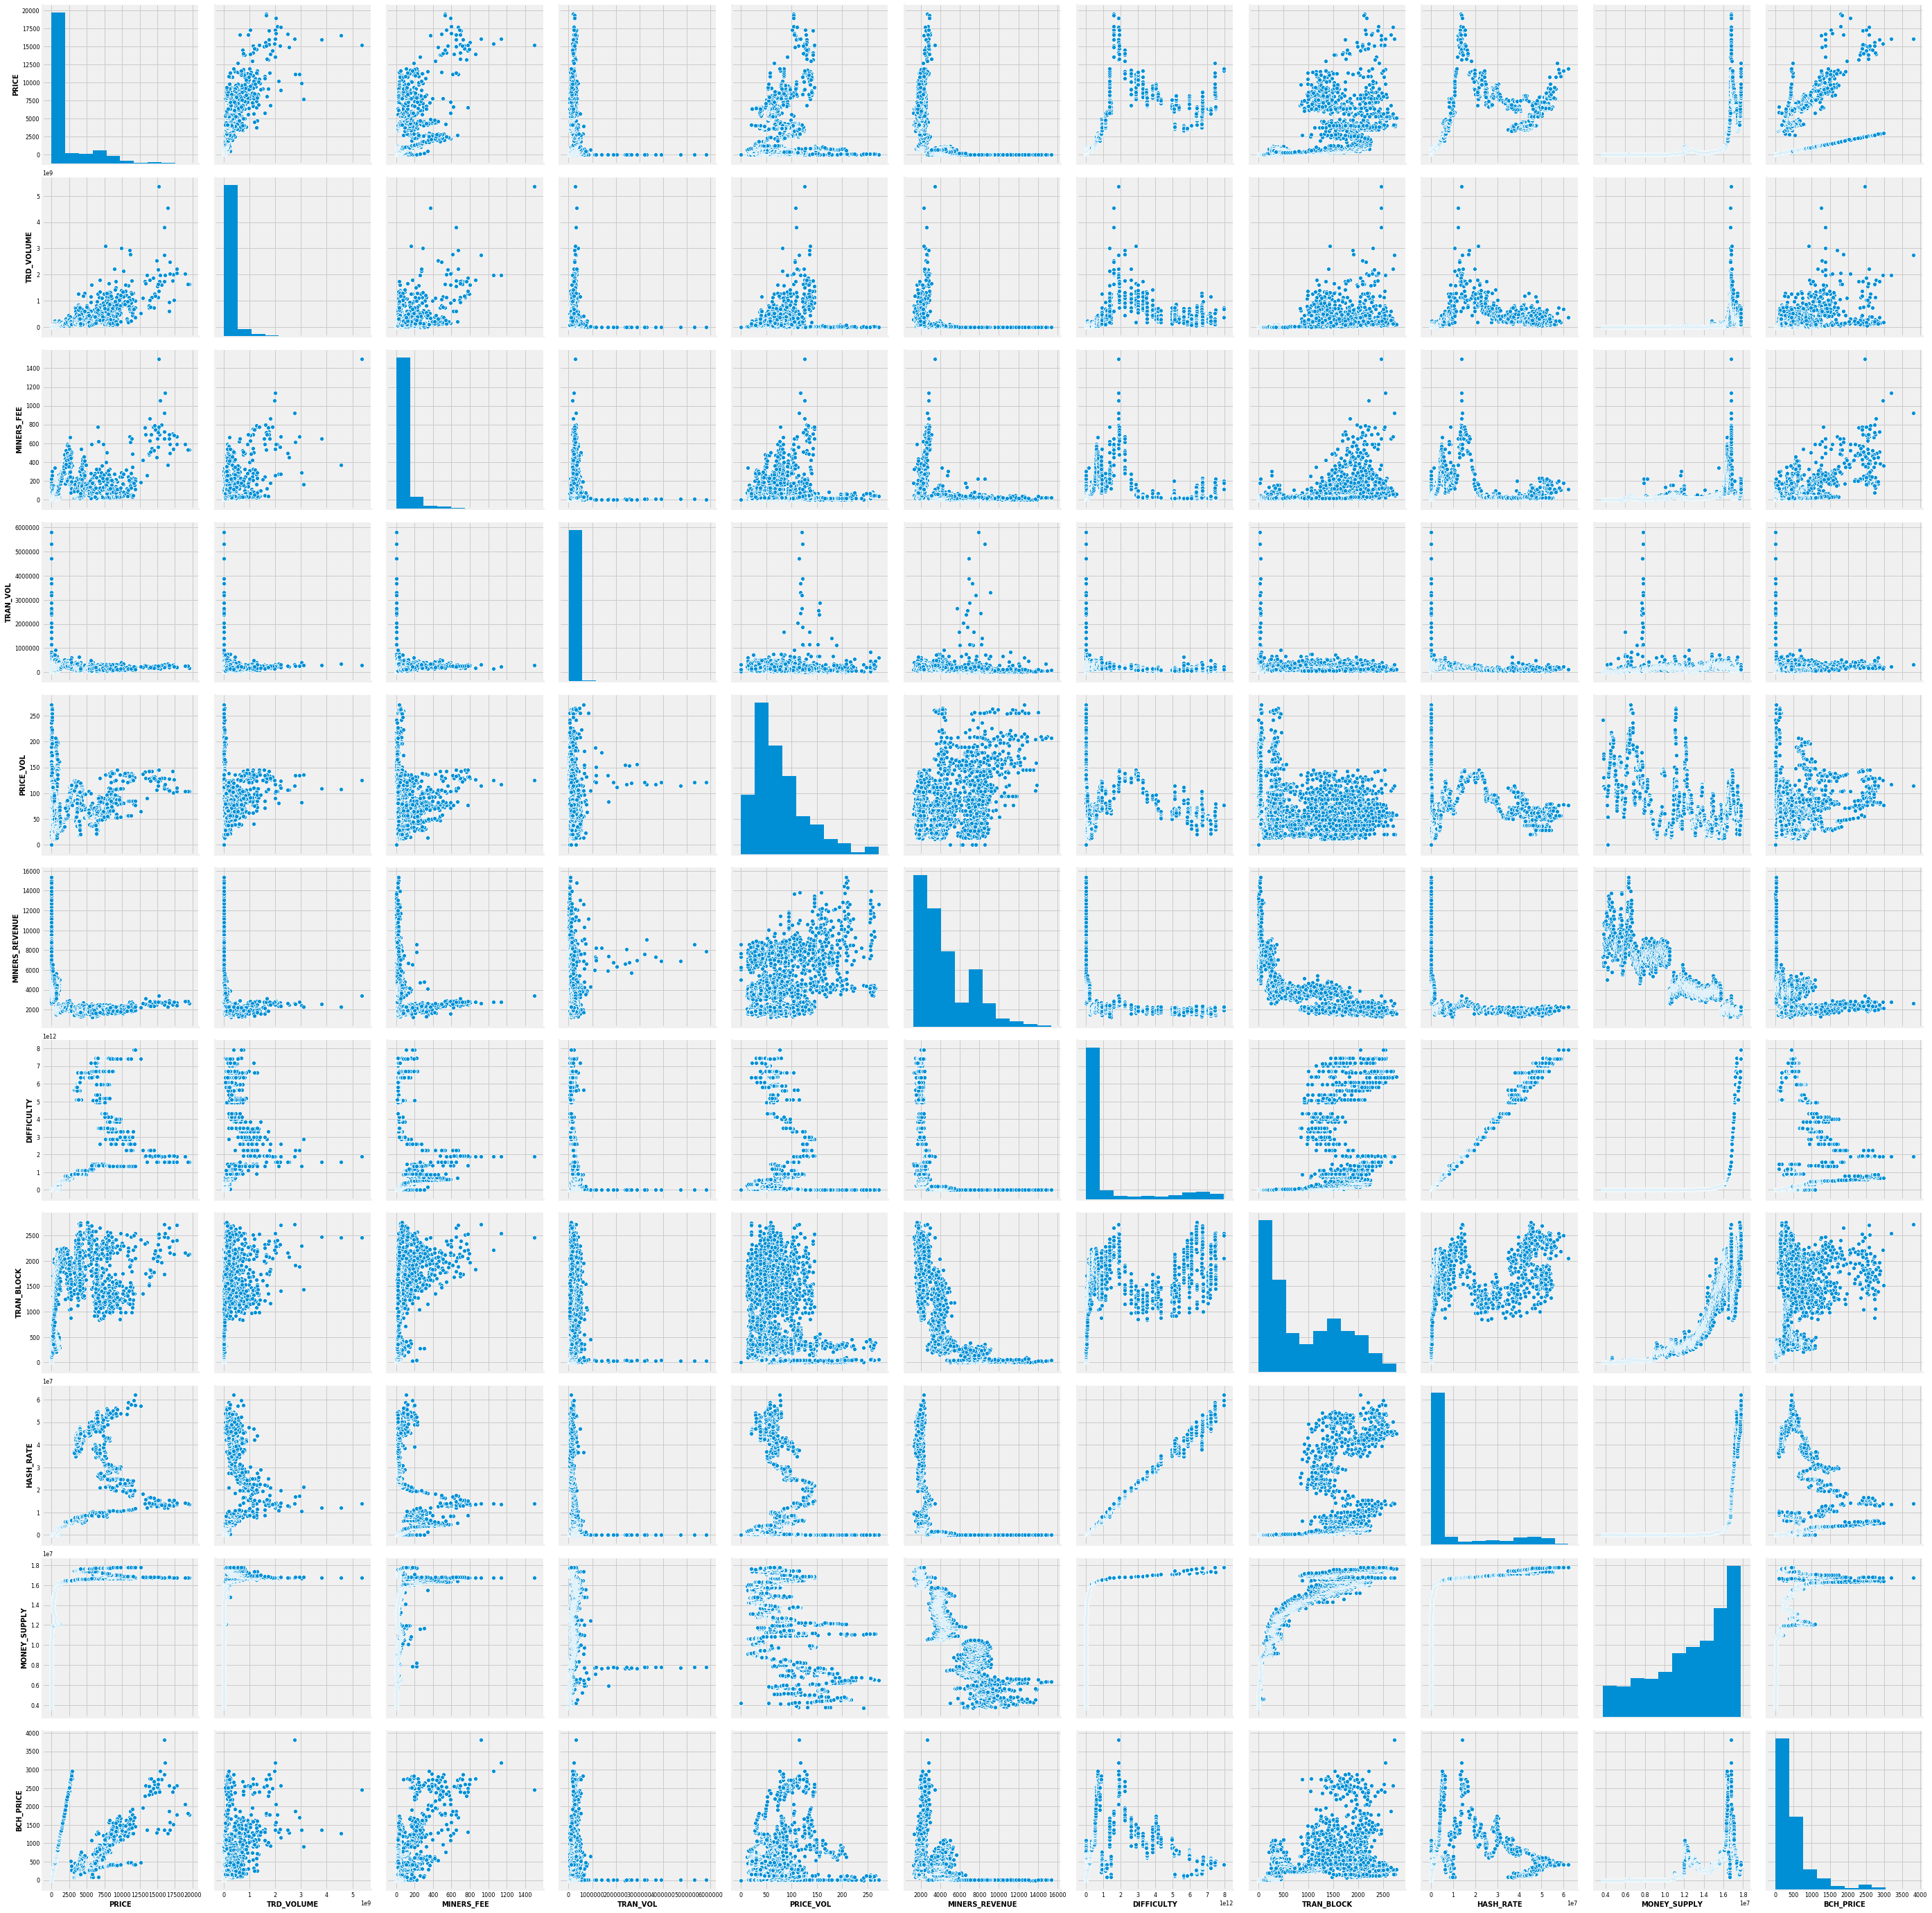

In [70]:
sns.pairplot(btc_data, size = 3.5)

highly correlated

1)Money supply and transections per block 

2)BCH price and transections per block 

3) Market cap and difficulty of mining bitcoin

4) hashrate and difficulty are almost perfectly correlated(we should drop one of thesse)

5) miners fee and bch price

6) transections per block and bch price

7) market cap and hash rate

Negatively corr

1) Miners revenue and transections per block 

2) Miners revenue and money supply(number of bitcoins)


We should drop difficulty as it is highly correlated with hashrate and trd volume.


In [71]:
X_train = X_train.drop(['DIFFICULTY'], axis=1)

### Observations

1) We have missing values for price volatility

2) Std dev of most of the columns is pretty high since 2010

3) We should reduce highly correlated features (this can be done using greedy algorithms or relying on L1 regularization of NNs)

4) Standardised features are not stationary which is evident from high shocks(non constant volatility) in the time series plot.



## Part 2

Basic Pre processing and split done in sub parts 2,3 of Part 1.

Now, lets do feture engineering to derive more predictors from past 28 days.
